# Table of contents



* [0. Requirements](#0)

* [1. Which roads appear to be the top 10 most dangerous roads of the Monterrey Metropolitan area?](#1)
 

* [2. What's the age group with the overall highest number of reported collisions?](#2)

* [3. What would be the odds for that person to have any type of positive alcohol ingestion opinion in "Garza Sada"?](#3)


* [4. Why do you think we use the phrase "appear to be"in question 1? What would you need to be able to speak with more confidence about the answer to that question?](#4)

* [5. What modeling project would you push to develop from the conclusions in this dataset?](#5)
  * [5.1 AutoML y Auto-Sklearn](#5.1)
  * [5.2 Pipeline profiler](#5.2)





  


  

In [1]:
#cargamo las librerias
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd


# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pylab import rcParams
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#matplotlib utils
import datetime
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# auto-sklearn dependencies
# Simply adding &> /dev/null to the tail of any command will silence its output outside of any errors that may arise.
!apt-get install swig -y &> /dev/null
!pip install Cython numpy &> /dev/null
!pip install auto-sklearn &> /dev/null
import sklearn
!pip install scipy==1.7.0 &> /dev/null

#import autosklearn.classification as classifier
from sklearn.model_selection import train_test_split
#evaluation dependencies
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
import pickle
!pip install pipelineprofiler &> /dev/null
import PipelineProfiler

<a id="1"></a>

# 1. Introducción
<p>El proceso estándar entre industrias para la minería de datos, conocido como <b> CRISP-DM </b> (Cross-industry standard process for data mining), es un modelo de proceso estándar abierto que describe enfoques comunes utilizados por expertos en minería de datos o ciencia de datos. Es el modelo de análisis más utilizado en la industria.</p>

 <p> En escencia, <b> CRISP DM </b> es un set de buenas practicas para ayudar a planear, organizar y ejecutar projectos de data mining or data analytics  </p>
 
 <p>El análisis presentado a continuación se realizó siguiendo las líneas de <b> CRISP DM</b> </p>


<center> <p><img class = "center" src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/CRISP-DM_Process_Diagram.png/319px-CRISP-DM_Process_Diagram.png" width="400" height="400 alt="CRISP-DM"></p> </center>

<a id="0"></a>

# 0. Requirements (Buisiness Understanding)

#### Case: Monterrey Metropolitan Area

The dataset you're given (MTY.csv) contains information about vehicle collision reports in the Monterrey Metropolitan area.

Analyze the data and answer the following questions based on it.


<font color='orange'> Questions </font>


1. Which roads appear to be the top 10 most dangerous roads of the Monterrey Metropolitan area?

2. What's the age group with the overall highest number of reported collisions? You can consider any age groupings for the purposes of this question. Explain this in a graphical way.

3. If you were to see a collision in the "Garza Sada" road, What would be the odds for that person to have any type of positive alcohol ingestion opinion?

4. Why do you think we use the phrase "appear to be"in question 1? What would you need to be able to speak with more confidence about the answer to that question?

5. What modeling project would you push to develop from the conclusions in this dataset?"



In [ ]:
#load dataset from repository
!rm -rf nowports_itv
!git clone https://github.com/EiderDiaz/nowports_itv


Cloning into 'nowports_itv'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 6 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


In [182]:
#read dataset into pandas dataframe
mty_df = pd.read_csv("MTY.csv")
mty_df


,Column,Calle,Causa,Ciudad,Cruce,Fecha,Hora,ID,Latitud,Lesionados,...,V2_Uso de Cinturón,V3_Arresto,V3_Dictamen,V3_Edad,V3_Estatus Licencia,V3_Género,V3_No. De Fallecidos,V3_No. De Lesionados,V3_Tipo de Vehículo,V3_Uso de Cinturón
0,0,CAMINO REAL,NO RESPETAR SEÑALAMIENTOS,Monterrey,SANTOS PALOMO,2016-05-01 00:00:00,1899-12-30 00:00:00,MTY1,25.77443,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,BERNARDO REYES,Otros,Monterrey,FIDEL VELAZQUEZ,2016-05-01 00:00:00,1899-12-30 00:00:00,MTY10,25.724161,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,BERNARDO REYES,Otros,Monterrey,REFORMA,2016-05-01 00:00:00,1899-12-30 00:00:00,MTY11,25.685874,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,LINCOLN,INVADIR CARRIL,Monterrey,CUMBRES DEL SOL,2016-05-01 00:00:00,1899-12-30 00:00:00,MTY12,25.797401,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,MADERO,NO GUARDAR DISTANCIA,Monterrey,PABLO A DE LA GARZA,2016-05-01 00:00:00,1899-12-30 00:00:00,MTY13,25.682219,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55008,25251,5 DE MAYO,NaN,San Pedro,DEGOLLADO,2017-04-30 00:00:00,09:12:00 a.m.,SP2212,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55009,25252,MANUEL SANTOS,NaN,San Pedro,HUMBERTO LOBO,2017-04-30 00:00:00,02:17:00 p.m.,SP2213,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55010,25253,CALZADA DEL VALLE,NaN,San Pedro,CALZADA SAN PEDRO,2017-04-30 00:00:00,03:41:00 p.m.,SP2214,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55011,25254,JOSE VASCONCELOS,NaN,San Pedro,CALZADA SAN PEDRO,2017-04-30 00:00:00,07:41:00 p.m.,SP2215,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
mty_df.describe()

,Column,Número total de lesionados,Número total de muertos,V1_Edad,V1_No. De Lesionados,V2_No. De Lesionados,V3_No. De Lesionados
count,55013.000000,28007.000000,21491.000000,4.614500e+04,22314.000000,17743.000000,10567.000000
mean,13844.814607,0.076195,0.003164,1.021139e+11,0.035404,0.040861,0.002271
std,8097.883654,0.472004,0.063181,1.389171e+12,0.350428,0.264089,0.081363
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,6876.000000,0.000000,0.000000,2.600000e+01,0.000000,0.000000,0.000000
50%,13753.000000,0.000000,0.000000,3.500000e+01,0.000000,0.000000,0.000000
75%,20629.000000,0.000000,0.000000,4.500000e+01,0.000000,0.000000,0.000000
max,29756.000000,21.000000,4.000000,1.900030e+13,31.000000,10.000000,7.000000


In [264]:

mty_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55013 entries, 0 to 55012
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Column                       55013 non-null  int64  
 1   Calle                        54998 non-null  object 
 2   Causa                        48986 non-null  object 
 3   Ciudad                       55009 non-null  object 
 4   Cruce                        53444 non-null  object 
 5   Fecha                        55010 non-null  object 
 6   Hora                         51656 non-null  object 
 7   ID                           55009 non-null  object 
 8   Latitud                      25551 non-null  object 
 9   Lesionados                   27935 non-null  object 
 10  Longitud                     34515 non-null  object 
 11  Mes                          54908 non-null  object 
 12  Muertos                      22379 non-null  object 
 13  No. De Infracció

<a id="1"></a>

## <font color='orange'> 1) Which roads appear to be the top 10 most dangerous roads of the Monterrey Metropolitan area? </font>




In [64]:
#calculate the top 10 more repeated roads
top_10_danger = mty_df.Calle.value_counts().iloc[:10]
top_10_danger

MORONES PRIETO      1729
LAZARO CARDENAS     1279
GONZALITOS          1229
GARZA SADA          1215
ALFONSO REYES       1153
JOSE VASCONCELOS     964
LEONES               891
AV. LINCOLN          838
CONSTITUCION         823
FIDEL VELAZQUEZ      752
Name: Calle, dtype: int64

Text(0.5, 1.0, 'Top 10 dangerous roads in Monterrey (reported collisions) ')

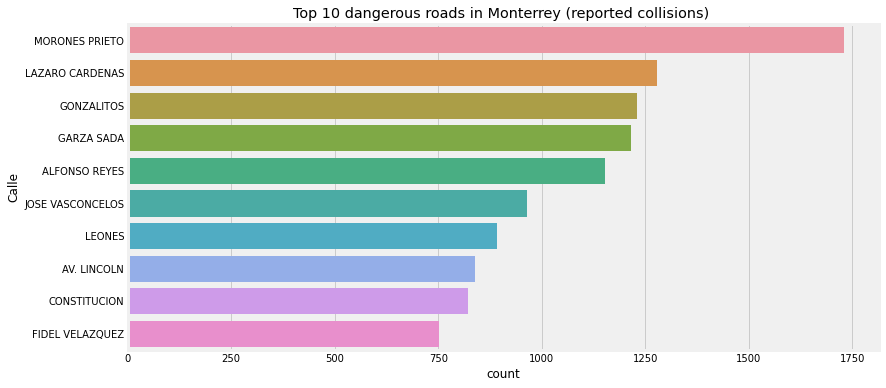

In [265]:
#just plot the top 10 in a count plot
plt.figure(figsize = (12, 6))
sns.countplot(data=mty_df, y='Calle', order=top_10_danger.index)
plt.title('Top 10 dangerous roads in Monterrey (reported collisions) ')


## Preliminary conclusions for Q1

We obtain the top 10 streets with the most incidents within the dataframe (and since each observation of the df represents a collision).

The preliminary analysis indicates that MORONES PRIETO is the most dangerous street with more than 1700 incidents, followed by LAZARO CARDENAS, GONZALITOS and GARZA SADA who oscillate around 1200.

At this preliminary point, the question arises as to what makes a dangerous road? The ones that have fatal accidents?

<hr>


<a id="2"></a>

## <font color='orange'> 2) What's the age group with the overall highest number of reported collisions?  </font> You can consider any age groupings for the purposes of this question. Explain this in a graphical way.

In [183]:
#clean the column edad from non digits
mty_df['V1_Edad'] = mty_df['V1_Edad'].map(lambda x: ''.join([i for i in str(x) if i.isdigit()]) )
#replace all empty strings or spaces with a None on every column
mty_df = mty_df.replace(r'^\s*$', None, regex=True)
mty_df.V1_Edad.value_counts()

                  8868
30                1525
27                1494
25                1488
26                1482
                  ... 
19000225000000       1
19000119000000       1
90                   1
94                   1
9                    1
Name: V1_Edad, Length: 134, dtype: int64

In [184]:
#set to None the elements with a value higher than 100 (we have typos like 19000225000000 )
mty_df['V1_Edad'] = mty_df['V1_Edad'].map(lambda x:  int(x) if x and int(x) < 100 else None ) 
mty_df.V1_Edad.value_counts()

30.0    1525
27.0    1494
25.0    1488
26.0    1482
34.0    1468
        ... 
6.0        1
89.0       1
96.0       1
7.0        1
9.0        1
Name: V1_Edad, Length: 86, dtype: int64

Text(0.5, 1.0, 'Boxplot of age distribution ')

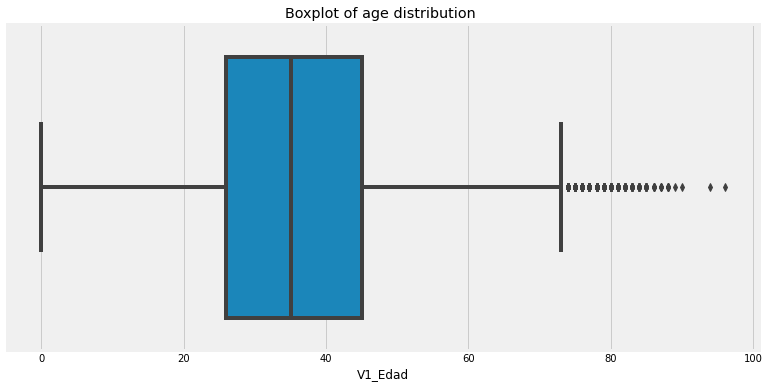

In [210]:
#double check the distribution with a boxplot 
plt.figure(figsize = (12, 6))
sns.boxplot(x=mty_df.V1_Edad)
plt.title('Boxplot of age distribution ')


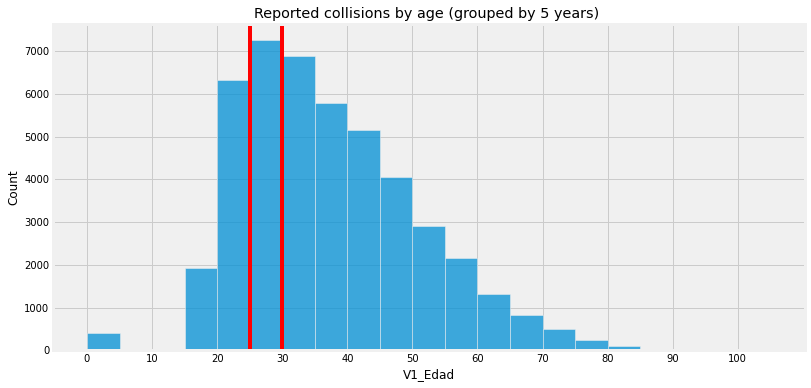

In [266]:

plt.figure(figsize = (12, 6))
# set the bins of size 5 from 0 to 100
bins = np.arange(0, 110, 5)
fig = sns.histplot(mty_df['V1_Edad'], bins=bins)
plt.title('Reported collisions by age (grouped by 5 years) ')
#custom ticks to make more sense of the custom bins
plt.xticks(np.arange(0, 110, 10))
# lines to delimit the highest age group
plt.axvline(25, 0, 1, color = "r")
plt.axvline(30, 0, 1,color="r")


## Preliminary conclusions for Q2

After manipulating the 'V1_Edad' feature in order to only contain valid ages, we can determine that the age group from 25 to 30 has the highest number of reported collisions (taking in cosideration that the agegrouping was 5 years)

Further, we can also depict that after this specific age group the tendency of collisions decrease uniformly as the years goes. 

<hr>

 <a id="3"></a>

 ## <font color='orange'> 3) If you were to see a collision in the "Garza Sada" road, What would be the odds for that person to have any type of positive alcohol ingestion opinion? </font> 


### Given :


$Odds$(in favor of A) $= \frac{P(A)}{P(not A)}$


In [144]:
mty_df["Por alcohol"].value_counts()

No                    12432
Ninguno                3254
Sí                     1797
SD                     1342
No ebrio                369
Ebrio completo           52
Ebrio incompleto         10
HUYO                      9
Aliento alcohólico        5
Efectos de droga          1
Name: Por alcohol, dtype: int64

In [193]:
# list that correspond to any alcohol ingestion
alcohol_ingestion = ["Sí", "Ebrio completo" , "Ebrio incompleto","Aliento alcohólico"]
#total observations where a collision in GARZA SADA is observed 
total = mty_df[(mty_df["Calle"] == "GARZA SADA")].count()["Calle"]
#observations where a collision in GARZA SADA and alcohol ingestion is observed
favorable = mty_df[(mty_df["Calle"] == "GARZA SADA") & (mty_df["Por alcohol"].isin(alcohol_ingestion))].count()["Calle"]
#observations where a collision in GARZA SADA and alcohol ingestion is NOT observed
unfavorable = total - favorable

print("total: ", total)
print("favorable: ", favorable)
print("unfavorable: ", unfavorable)
#odds = favorable / unfavorable
print("________________________")
print("odds collision in Garza Sada and alcohol ingestion:", str(favorable) +" to "+ str(unfavorable))



total:  1215
favorable:  82
unfavorable:  1133
________________________
odds collision in Garza Sada and alcohol ingestion: 82 to 1133



<hr>


 <a id="4"></a>

 ## <font color='orange'> 4) Why do you think we use the phrase "appear to be"in question 1? What would you need to be able to speak with more confidence about the answer to that question?  </font>

  IT is needed to able to speak about what "dangerous" means, can it be the road with more collitions or, more injured or even more deaths on a given road 

In [205]:
mty_df.value_counts([ "Lesionados"])

Lesionados
No            24059
0              1985
SD              946
Sí              865
1                62
2                10
3                 6
4                 1
5                 1
dtype: int64

In [235]:
#top_10_danger
lesionados_list = ["Sí","1","2","3","4","5"]
#subseting the df
lesionados_df = mty_df[mty_df["Lesionados"].isin(lesionados_list)]
# get the top 10 
top_10_lesionados = pd.value_counts(lesionados_df["Calle"]).iloc[:10]

top_10_lesionados

AV. LINCOLN              34
BLVD HEBERTO CASTILLO    18
JOSE VASCONCELOS         17
AZTLAN                   17
MORONES PRIETO           16
BERNARDO REYES           16
LINCOLN                  15
RAUL SALINAS             13
ALFONSO REYES            13
GARZA SADA               13
Name: Calle, dtype: int64

Text(0.5, 1.0, 'Top 10 more dangerous roads in Monterrey (injured) ')

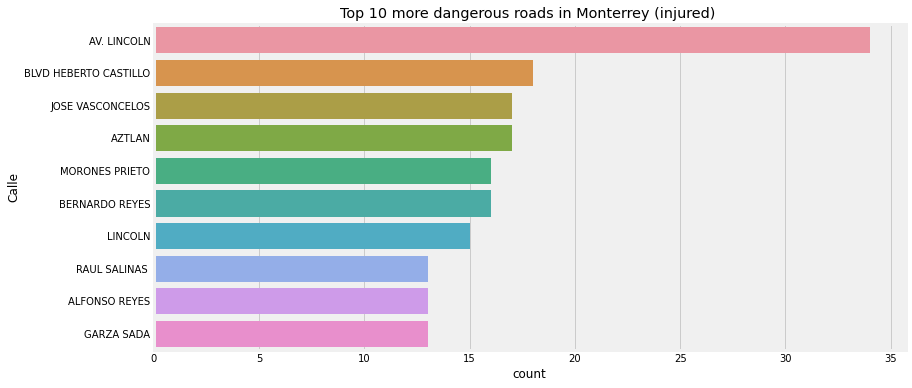

In [236]:
plt.figure(figsize = (12, 6))
sns.countplot(data=lesionados_df, y='Calle',order=top_10_lesionados.index )
plt.title('Top 10 more dangerous roads in Monterrey (injured) ')

In [237]:
mty_df.value_counts(["Muertos"])

Muertos  
No           19943
0             2020
Sí             362
SD              43
1                6
HUYO             3
SE RETIRO        2
dtype: int64

In [240]:
muertos_list = ["Sí","1"]
#subseting the df
muertos_df = mty_df[mty_df["Muertos"].isin(muertos_list)]
# get the top 10 
top_10_muertos = pd.value_counts(muertos_df["Calle"]).iloc[:10]


top_10_muertos

AZTLAN            15
MADERO            11
JUAREZ             9
COLON              9
LEONES             7
RUIZ CORTINEZ      7
LUIS D COLOSIO     7
CAMINO REAL        6
MORONES PRIETO     6
PINO SUAREZ        6
Name: Calle, dtype: int64

Text(0.5, 1.0, 'Top 10 more dangerous roads in Monterrey (Deaths) ')

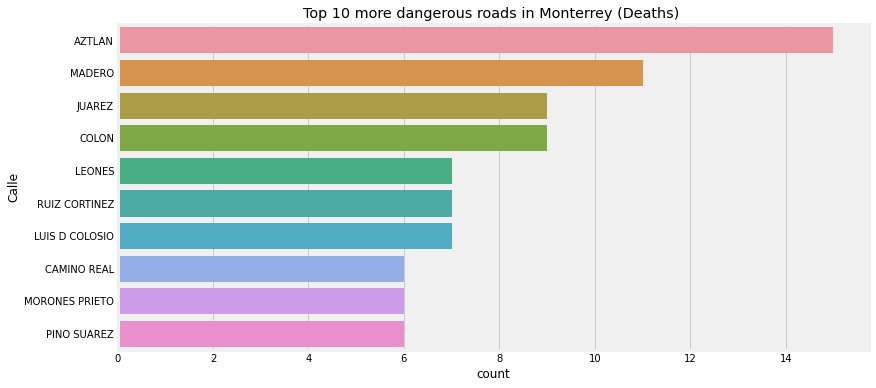

In [241]:
plt.figure(figsize = (12, 6))
sns.countplot(data=muertos_df, y='Calle',order=top_10_muertos.index )
plt.title('Top 10 more dangerous roads in Monterrey (Deaths)')

## Preliminary conclusions for Q4

It is needed to be able to talk about what "dangerous" means, can it be the road with the most collisions or, more injuries or even more deaths on a given road?
 
We can depict in the following chart that MORONES PRIETO althoug is the street with more collisions, is the 5th street with more injured indicents and the 9th in deaths.

Aslo AZTLAN road is not on the top 10 collitions but its the highest on deaths.

maybe a muiltivariate index with the aforementioned features can state how dangerous a given road is. 




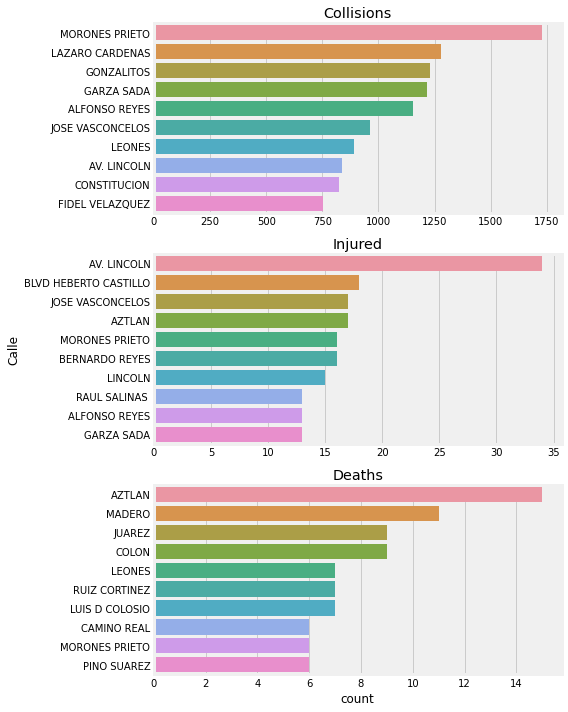

In [263]:
f,axs=plt.subplots(nrows= 3,ncols= 1,figsize=(8,10))
#top 10 collitions
sns.countplot(data=mty_df, y='Calle', order=top_10_danger.index, ax=axs[0])
axs[0].set_title('Collisions')
axs[0].set_ylabel('')
axs[0].set_xlabel('')

# top 10 injured
sns.countplot(data=lesionados_df, y='Calle',order=top_10_lesionados.index , ax=axs[1])
axs[1].set_title('Injured')
axs[1].set_xlabel('')

#top 10 death

sns.countplot(data=muertos_df, y='Calle',order=top_10_muertos.index, ax=axs[2] )
axs[2].set_title('Deaths')
axs[2].set_ylabel('')

f.tight_layout()

<hr>

 <a id="5"></a>
 ## <font color='orange'> 5) What modeling project would you push to develop from the conclusions in this dataset?" </font>

In [244]:
mty_df.Hora.value_counts()

1899-12-30 00:00:00    20381
SD                       222
8                        132
18:00:00                 130
13                       122
                       ...  
2016-08-10 10:52:46        1
2016-08-10 10:33:51        1
2016-08-10 10:05:48        1
2016-08-10 09:47:29        1
05:05:00 a.m.              1
Name: Hora, Length: 8642, dtype: int64

If we talk about modeling behavior over time, such as determining the number of collisions or injuries per day and predicting those of the following days, we could use the tools of a TSA (after clean and combine 'Fecha' and 'Hora'), such as ARIMA models (statsmodels).

On the other hand, if we want to do classification or regression tasks, we can do an exploration of learning pipelines using AutoML tools such as Auto-Sklearn.

<a id="5.1"></a>
## 5.1 AutoML and Auto-Sklearn



This image taken from Azure's AutoML service illustrates the panorama.


<center> <p><img class = "center" src="https://i0.wp.com/neptune.ai/wp-content/uploads/Microsoft-Azure-AutoML.png" width="700" height="350" alt="autoML"></p> </center>

### 5.1.1 Auto-Sklearn
auto-sklearn is based on defining AutoML as a CASH problem.

CASH = (Combined Algorithm Selection and Hyperparameter optimization) o Selection of combined algorithms and hyperparameter optimization.

Simply put, we want to find the best ML model and its hyperparameter for a data set in a vast search space, which includes many classifiers and many hyperparameters. In the following figure, you can see a representation of auto-sklearn provided by its authors.


<center> <p><img class = "center" src="https://i1.wp.com/neptune.ai/wp-content/uploads/AutoML-system.png" width="900" height="150" alt="Auto-sklearn"></p> </center>



## 5.2 pipeline profiler

a pipeline profiler is a library intended to produce detailed visualizations of autoMl pipelines.

<center> <p><img class = "center" src="https://miro.medium.com/max/700/1*xfmgKt_v1lVRlTN0zcqQBA.png
" width="600" height="450" alt="Auto-sklearn"></p> </center>

Figure 1 shows *PipelineProfiler* applied to the *Digits* dataset. The system is divided into three parts.
- 1) The primitive contribution, which shows the correlation of the primitive use with the score of the determined pipeline.

- 2) Pipeline Matrix, which presents a summary of the pipelines, the primitives used and the hyperparameters.

- 3) The pipeline comparison view, which highlights the differences between the selected pipelines.


In conclusion we could use Auto-Sklearn combined with a *PipelineProfiler* to observe in detail the different combinations of different preprocesses, classifiers and hyperparameters that were used to obtain the best model and once we are sure to send the appropriate model to production.

posible modeling projects to explore from the conclusions:

-  <font color='purple'> based on the road, datetime, and acohol ingestion determine if a given colission has death or not (classification)   </font>

- <font color='purple'> based previous obervations predict the number of collisions or injuries the next days (TSA) </font>

- <font color='purple'> based on the road, datetime, and acohol ingestion determine determine how many injured persons will be (regression)  </font>

<hr>